<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Выявление-закономерностей,-определяющих-успешность-игры" data-toc-modified-id="Выявление-закономерностей,-определяющих-успешность-игры-1">Выявление закономерностей, определяющих успешность игры</a></span></li><li><span><a href="#1.-Подготовка-данных." data-toc-modified-id="1.-Подготовка-данных.-2">1. Подготовка данных.</a></span></li><li><span><a href="#1.1-Переименуем-столбцы" data-toc-modified-id="1.1-Переименуем-столбцы-3">1.1 Переименуем столбцы</a></span></li><li><span><a href="#1.2-Преобразуем-типы-данных" data-toc-modified-id="1.2-Преобразуем-типы-данных-4">1.2 Преобразуем типы данных</a></span></li><li><span><a href="#1.3-Посчитаем-суммарные-продажи-во-всех-регионах" data-toc-modified-id="1.3-Посчитаем-суммарные-продажи-во-всех-регионах-5">1.3 Посчитаем суммарные продажи во всех регионах</a></span></li><li><span><a href="#2.-Исследовательский-анализ-данных" data-toc-modified-id="2.-Исследовательский-анализ-данных-6">2. Исследовательский анализ данных</a></span></li><li><span><a href="#3.-Портрет-пользователя-каждого-региона" data-toc-modified-id="3.-Портрет-пользователя-каждого-региона-7">3. Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#3.1-Портрет-пользователя-Северной-Америки" data-toc-modified-id="3.1-Портрет-пользователя-Северной-Америки-7.1">3.1 Портрет пользователя Северной Америки</a></span></li><li><span><a href="#3.2-Портрет-пользователя-Европы" data-toc-modified-id="3.2-Портрет-пользователя-Европы-7.2">3.2 Портрет пользователя Европы</a></span></li><li><span><a href="#3.3-Портрет-пользователя-Японии" data-toc-modified-id="3.3-Портрет-пользователя-Японии-7.3">3.3 Портрет пользователя Японии</a></span></li></ul></li><li><span><a href="#4.-Проверка-гипотез" data-toc-modified-id="4.-Проверка-гипотез-8">4. Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-9">Общий вывод:</a></span></li></ul></div>

# Выявление закономерностей, определяющих успешность игры

Целью проекта является научиться выявлять закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Для выполнения цели необходимо решить следующие задачи:

1. Провести исследовательский анализ данных.
2. Сформировать портрет пользователя каждого региона. 
3. Проверить гипотезы.
4. Сформулировать выводы.
<div>Данные для работы взяты из открытых источников. Они содержат историю  продаж игр, оценки пользователей и экспертов, жанры и платформы. 

# 1. Подготовка данных.

In [1]:
import pandas as pd #импортируем pandas как pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
#импорт библиотеки позволяющей игнорировать несущественные ошибки
import warnings
warnings.filterwarnings('ignore')
#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
#лишние запятые и экспоненциальные формы убираем
pd.options.display.float_format = '{:,.2f}'.format
#вывод значений без сокращений
pd.set_option('display.max_colwidth', -1)

In [2]:
#data = pd.read_csv('/datasets/games.csv') # читаем файл csv
data = pd.read_csv('C:\\Users\\algol\\Downloads\\games.csv')


In [3]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма, 
#а также явных дубликатов
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    count_duplicates = df.duplicated().sum()
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing,
                                     'num_duplicates': count_duplicates})
    
    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', df_data.shape[0])
    print('Количество столбцов файла:', df_data.shape[1])
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках и явных дубликатах данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())

In [4]:
df_info(data)

Количество строк файла: 16715
Количество столбцов файла: 11

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
Year_of_Release,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0, 1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0, 2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0, 1993.0, 1994.0, 1982.0, 2016.0, 2003.0, 1986.0, 2000.0, nan, 1995.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0]",float64,37
NA_sales,"[41.36, 29.08, 15.68, 15.61, 11.27, 23.2, 11.28, 13.96, 14.44, 26.93, 9.05, 9.71, 9.0, 8.92, 15.0, 9.01, 7.02, 9.43, 12.78, 4.74, 6.38, 10.83, 9.54, 9.66, 8.41, 6.06, 3.43, 5.51, 6.85, 9.04, 5.89, 6.03, 9.7, 5.28, 4.99, 8.25, 8.52, 5.54, 6.99, 6.62, 5.03, 5.99, 3.96, 2.5, 7.97, 6.91, 4.34, 4.35, 3.01, 6.16, 6.76, 4.02, 4.89, 2.96, 4.76, 5.01, 6.73, 5.95, 3.66, 5.55, 7.04, 6.65, 3.88, 5.8, 4.1, 5.93, 4.36, 5.7, 2.03, 4.4, 5.05, 3.54, 1.12, 6.82, 1.75, 3.74, 1.06, 2.79, 2.91, 0.99, 2.57, 2.99, 2.28, 7.28, 2.76, 2.9, 2.81, 0.66, 3.78, 3.27, 3.56, 5.39, 4.59, 4.81, 4.46, 3.48, 2.85, 2.53, 2.98, 3.68, ...]",float64,402
EU_sales,"[28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, 9.18, 6.94, 0.63, 10.95, 7.47, 6.18, 8.03, 4.89, 8.49, 9.09, 0.4, 3.75, 9.2, 4.46, 2.71, 3.44, 5.14, 5.49, 3.9, 5.35, 3.17, 5.09, 4.24, 5.04, 5.86, 3.68, 4.19, 5.73, 3.59, 4.51, 2.55, 4.02, 4.37, 6.31, 3.45, 2.81, 2.85, 3.49, 0.01, 3.35, 2.04, 3.07, 3.87, 3.0, 4.82, 3.64, 2.15, 3.69, 2.65, 2.56, 3.11, 3.14, 1.94, 1.95, 2.47, 2.28, 3.42, 3.63, 2.36, 1.71, 1.85, 2.79, 1.24, 6.12, 1.53, 3.47, 2.24, 5.01, 2.01, 1.72, 2.07, 6.42, 3.86, 0.45, 3.48, 1.89, 5.75, 2.17, 1.37, 2.35, 1.18, 2.11, 1.88, 2.83, 2.99, 2.89, 3.27, 2.22, 2.14, 1.45, 1.75, 1.04, 1.77, ...]",float64,307
JP_sales,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.93, 4.7, 0.28, 1.93, 4.13, 7.2, 3.6, 0.24, 2.53, 0.98, 0.41, 3.54, 4.16, 6.04, 4.18, 3.84, 0.06, 0.47, 5.38, 5.32, 5.65, 1.87, 0.13, 3.12, 0.36, 0.11, 4.35, 0.65, 0.07, 0.08, 0.49, 0.3, 2.66, 2.69, 0.48, 0.38, 5.33, 1.91, 3.96, 3.1, 1.1, 1.2, 0.14, 2.54, 2.14, 0.81, 2.12, 0.44, 3.15, 1.25, 0.04, 0.0, 2.47, 2.23, 1.69, 0.01, 3.0, 0.02, 4.39, 1.98, 0.1, 3.81, 0.05, 2.49, 1.58, 3.14, 2.73, 0.66, 0.22, 3.63, 1.45, 1.31, 2.43, 0.7, 0.35, 1.4, 0.6, 2.26, 1.42, 1.28, 1.39, 0.87, 0.17, 0.94, 0.19, 0.21, 1.6, 0.16, 1.03, 0.25, 2.06, 1.49, 1.29, ...]",float64,244
Other_sales,"[8.45, 0.77, 3.29, 2.95, 1.0, 0.58, 2.88, 2.84, 2.24, 0.47, 2.74, 1.9, 0.71, 2.15, 1.69, 1.77, 3.96, 10.57, 0.55, 2.04, 1.36, 0.42, 0.46, 1.41, 1.78, 0.5, 1.18, 0.8, 1.16, 1.32, 0.59, 2.38, 1.13, 0.78, 2.42, 1.12, 1.28, 1.57, 1.3, 1.01, 0.91, 1.79, 1.97, 0.86, 1.21, 0.23, 0.76, 0.74, 7.53, 0.29, 1.03, 0.52, 2.11, 1.6, 1.61, 0.35, 0.97, 1.06, 0.63, 0.15, 0.79, 0.96, 1.25, 0.9, 0.81, 0.39, 0.68, 0.85, 0.18, 0.08, 0.67, 0.7, 0.41, 0.33, 0.6, 0.54, 1.73, 1.23, 0.16, 1.11, 0.31, 0.48, 0.62, 0.19, 0.69, 1.02, 0.73, 1.08, 0.45, 0.28, 0.51, 0.22, 1.09, 0.99, 0.3, 0.64, 0.66, 0.98, 1.39, 0.14, ...]",float64,155
Critic_Score,"[76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0, 61.0, 97.0, 95.0, 77.0, 88.0, 83.0, 94.0, 93.0, 85.0, 86.0, 98.0, 96.0, 90.0, 84.0, 73.0, 74.0, 78.0, 92.0, 71.0, 72.0, 68.0, 62.0, 49.0, 67.0, 81.0, 66.0, 56.0, 79.0, 70.0, 59.0, 64.0, 75.0, 60.0, 63.0, 69.0, 50.0, 25.0, 42.0, 44.0, 55.0, 48.0, 57.0, 29.0, 47.0, 65.0, 54.0, 20.0, 53.0, 37.0, 38.0, 33.0, 52.0, 30.0, 32.0, 43.0, 45.0, 51.0, 40.0, 46.0, 39.0, 34.0, 35.0, 41.0, 36.0, 28.0, 31.0, 27.0, 26.0, 19.0, 23.0, 24.0, 21.0, 17.0, 22.0, 13.0]",float64,82
Name,"[Wii Sports, Super Mario Bros., Mario Kart Wii, Wii Sports Resort, Pokemon Red/Pokemon Blue, Tetris, New Super Mario Bros., Wii Play, New Super Mario Bros. Wii, Duck Hunt, Nintendogs, Mario Kart DS, Pokemon Gold/Pokemon Silver, Wii Fit, Kinect Adventures!, Wii Fit Plus, Grand Theft Auto V, Grand Theft Auto: San Andreas, Super Mario World, Brain Age: Train Your Brain in Minutes a Day, Pokemon Diamond/Pokemon Pearl, Super Mario Land, Super Mario Bros. 3, Grand Theft Auto: Vice City, Pokemon Ruby/Pokemon Sapphire, Brain Age 2: More Training in Minutes a Day, Pokemon Black/Pokemon White, G


Информация о пропусках и явных дубликатах данных:


,column_name,num_missing,percent_missing,num_duplicates
Name,Name,2,0.01,0
Platform,Platform,0,0.00,0
Year_of_Release,Year_of_Release,269,1.61,0
Genre,Genre,2,0.01,0
NA_sales,NA_sales,0,0.00,0
EU_sales,EU_sales,0,0.00,0
JP_sales,JP_sales,0,0.00,0
Other_sales,Other_sales,0,0.00,0
Critic_Score,Critic_Score,8578,51.32,0
User_Score,User_Score,6701,40.09,0



Первые пять строк таблицы:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


1. В датасете много столбцов с пропусками. Особенно много пропусков в столбцах с оценками критиков и пользователей, а также в рейтинге возрастных групп. Для оценок критиков и пользователей данных вероятно нет, а рейтинг возрастных груп тоже может быть не установлен. Под замену пропущенным значениям в этих столбцах не подойдут ни средние, ни медианы, т.к. это оценочные данные. Пропущенные значения появились в результате выгрузки данных либо пропущены в ходе заполнения. То что это пропуски указывает их название - Nan.   
<div>2.В столбце Год цифры десятичные нужно заменить на целые. User_score нужно перевести в числовой формат.<div>3.Строки с отсутствующими годами удалим. Их мало и на результат они не повлияют. 

Описание данных
<div>Name — название игры
<div>Platform — платформа
<div>Year_of_Release — год выпуска
<div>Genre — жанр игры
<div>NA_sales — продажи в Северной Америке (миллионы проданных копий)
<div>EU_sales — продажи в Европе (миллионы проданных копий)
<div>JP_sales — продажи в Японии (миллионы проданных копий)
<div>Other_sales — продажи в других странах (миллионы проданных копий)
<div>Critic_Score — оценка критиков (максимум 100)
<div>User_Score — оценка пользователей (максимум 10)
<div>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# 1.1 Переименуем столбцы

In [5]:
data.rename(columns = {"Name":"name", 'Platform':'platform', 'Year_of_Release': 'year_of_release', 
                       'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 
                       "Other_sales":'other_sales', "Critic_Score":'critic_score', 'User_Score':"user_score",
                       'Rating':'rating'}, inplace = True)
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 1.2 Преобразуем типы данных

In [6]:
#удаляем строки с пропущенными годами
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'].isna().sum()
#В столбцt Год цифры десятичные нужно заменить на целые
data['year_of_release']=data['year_of_release'].astype('int')
#User_score нужно перевести в числовой формат и заменить 'tbd' на 'nan'
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype(float)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


TBD - аббревиатура от английского To Be Determined (будет определено). Значит это значение, которое должен поставить пользователь неизвестно. Предсказать, что он поставит невозможно, поэтому мы их заменяем на nan в столбце user_score. 

# 1.3 Посчитаем суммарные продажи во всех регионах

In [7]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9609,Fuse (Insomniac),X360,2013,Shooter,0.09,0.03,0.00,0.01,NaN,NaN,NaN,0.13
5945,Need for Speed Underground,GBA,2003,Racing,0.21,0.08,0.00,0.01,77.00,8.20,E,0.30
1257,NFL Blitz,PS,1998,Sports,1.41,0.05,0.00,0.04,NaN,NaN,NaN,1.50
13755,Paws & Claws: Regal Resort,DS,2010,Simulation,0.04,0.00,0.00,0.00,NaN,NaN,NaN,0.04
11807,And1 Streetball,XB,2006,Action,0.06,0.02,0.00,0.00,NaN,NaN,NaN,0.08
1618,Crash Bandicoot: The Wrath of Cortex,XB,2002,Platform,0.59,0.57,0.00,0.07,70.00,8.10,E,1.23
12554,Bust-A-Move '99,N64,1998,Puzzle,0.05,0.01,0.00,0.00,NaN,NaN,NaN,0.06
13740,Lionel Trains: On Track,DS,2006,Action,0.04,0.00,0.00,0.00,47.00,NaN,E,0.04
15262,Puzzle Challenge: Crosswords and More!,PS2,2006,Puzzle,0.01,0.01,0.00,0.00,NaN,NaN,NaN,0.02
2140,Jampack Summer '99,PS,1999,Misc,0.54,0.36,0.00,0.06,NaN,NaN,NaN,0.96


Вывод. Пропуски выявлены. Типы данных изменены на необходимые. Добавлен столбец с суммарными продажами по регионам.

# 2. Исследовательский анализ данных

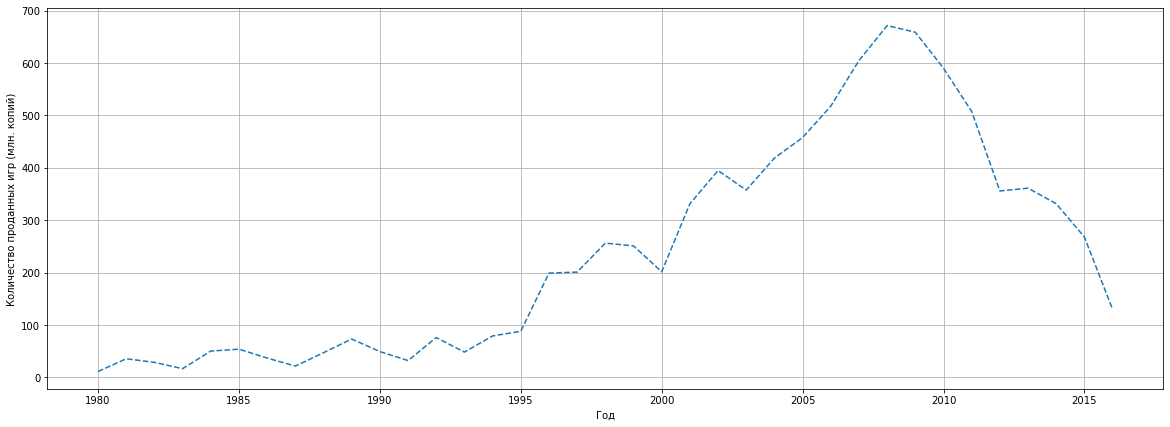

In [8]:
#для подсчета количества игр по годам построим новый датасет 
sales_per_year_sum = data.groupby('year_of_release')['total_sales'].sum()
sales_per_year_sum.plot(figsize = (20,7),grid=True,style='--')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр (млн. копий)')
plt.show()

Вероятно, что данные за период до 1995 не особо важен. Т.к. было мало продаж.

In [9]:
#определим игровые платформы 
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

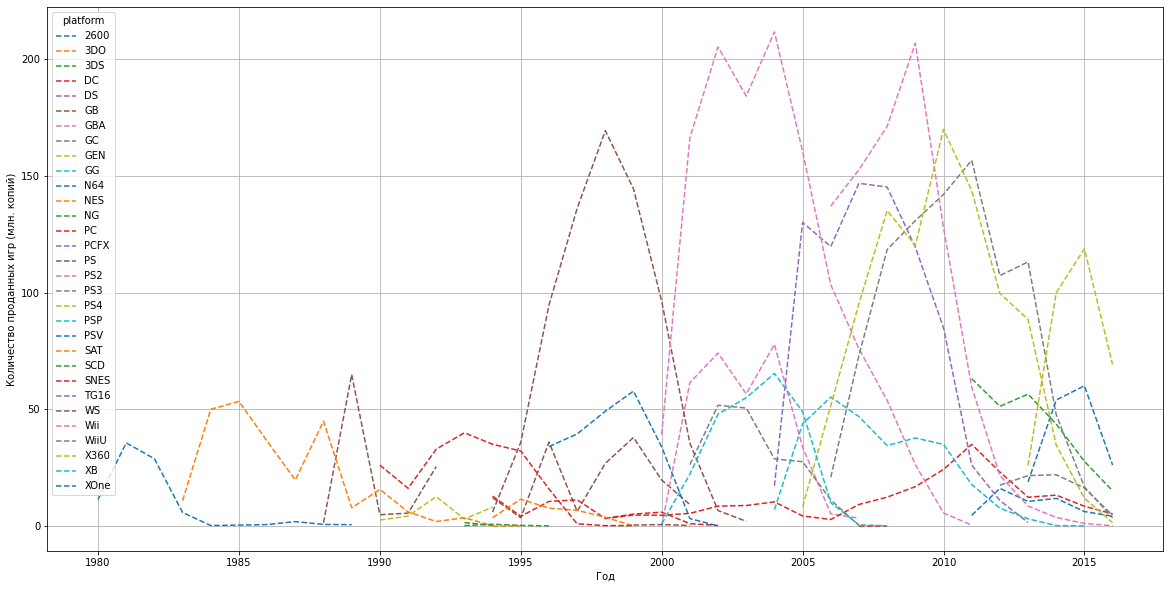

In [10]:
#Посмотрим, как менялись продажи по платформам.
data.query('platform in ["Wii", "NES", "GB", "DS", "X360", \
"PS3", "PS2", "SNES", "GBA", "PS4", "3DS", "N64", "PS", "XB", \
"PC", "2600", "PSP", "XOne","WiiU", "GC",         "GEN", "DC", \
"PSV", "SAT", "SCD", "WS", "NG", "TG16", "3DO", "GG", \
"PCFX"]').pivot_table(index='year_of_release', columns = 'platform', 
values='total_sales', aggfunc='sum').plot(grid=True, figsize=(20, 10), 
                                          style='--')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр (млн. копий)')
plt.show()

Из графиков видно, что в течении 5-10 лет старые платформы исчезают и появляются новые. Посчитаем точнее.

In [11]:
#зададим минимальные значимые продажи в млн
min_sales = 5
# посчитаем суммарные продажи в год выше минимума
report = data.groupby(['platform','year_of_release']).agg({'total_sales':
                            'sum'}).query('total_sales>@min_sales')
#посчитаем среднее число лет выше порога
mean = report.reset_index().groupby('platform').agg({'year_of_release':
                                                     'nunique'}).mean()
#посчитаем дисперсию и СКО времени жизни платформы, если считать, 
#что погибает она когда меньше 5 млн в год продают
variance = np.var(report.reset_index().groupby('platform').agg({'year_of_release':
                                                                'nunique'}))
standard_deviation = np.sqrt(variance)
print(mean, variance, standard_deviation)

year_of_release   6.92
dtype: float64 year_of_release   11.91
dtype: float64 year_of_release   3.45
dtype: float64


Появляются новые и исчезают старые платформы за 7 лет. Нужно определить платформу у которой за последние 3 года были лучшие продажи (с 2014 г.)

In [12]:
#сделаем срез данных с годами более и равно 2014
data_2014 = data.query('year_of_release >= 2014')
data_2014.groupby(['platform']).agg({'total_sales':
        'sum'}).sort_values(by=['total_sales'], ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Наилучшие продажи с 2014 г. показывает платформа PS4. Поэтому в 2017 г. лучше выпускать игру на платформе PS4.

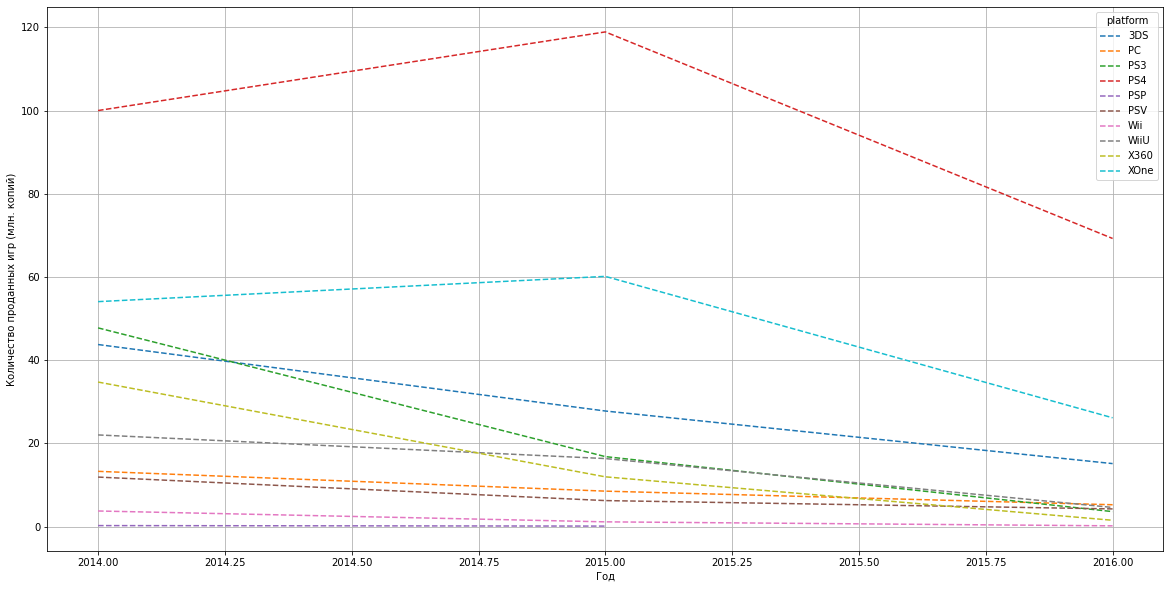

In [13]:
#Построим графики для платформ с 2014 г.
data_2014.query('platform in ["Wii", "DS", "X360", "PS3", "PS2", \
                "PS4", "3DS", "PC", "PSP", "XOne","WiiU", \
                "PSV"]').pivot_table(index='year_of_release', 
                columns = 'platform', values='total_sales',
                aggfunc='sum').plot(grid=True, figsize=(20, 10), style='--')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр (млн. копий)')
plt.show()

По продажам лидируют PS4, XOne и 3DS. 

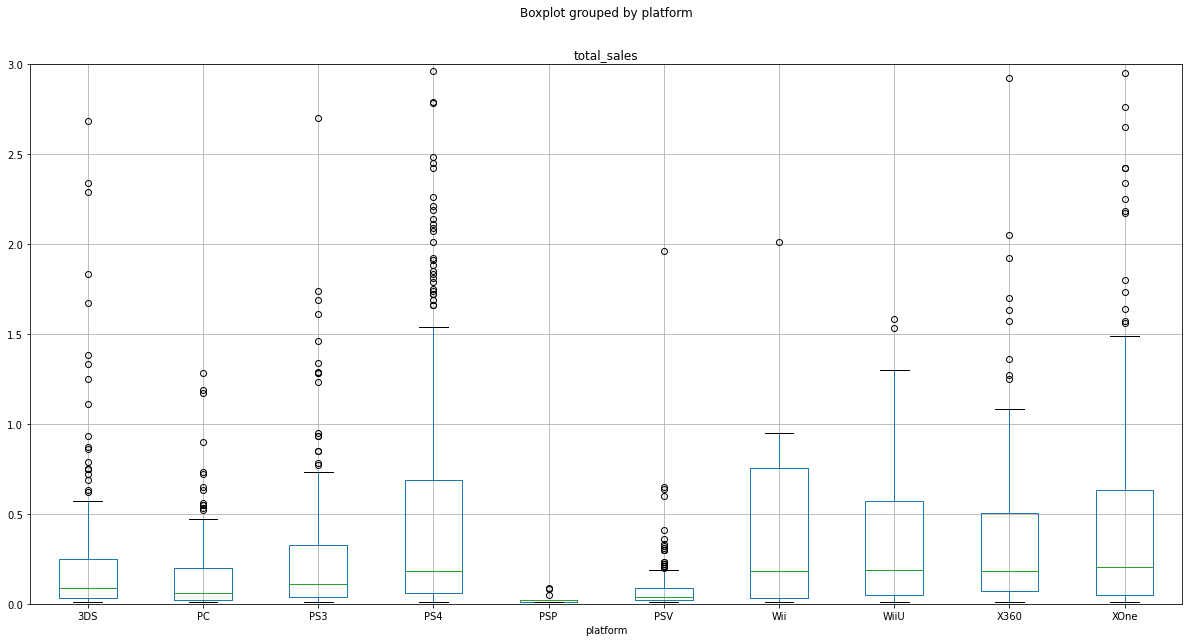

In [14]:
#оценим визуально выбросы в данных на "ящиках с усами"
data_2014.boxplot(column = 'total_sales', by = 'platform', figsize=(20, 10))
plt.ylim(0, 3);

Данные распределены очень неравномерно. Особенно в Wii есть большой выброс до значения более 30. Поэтому установили лимит по оси y = 3. На диаграммах размаха в ряде случаев 1 и 3 квартили не видны из-за больших выбросов.  

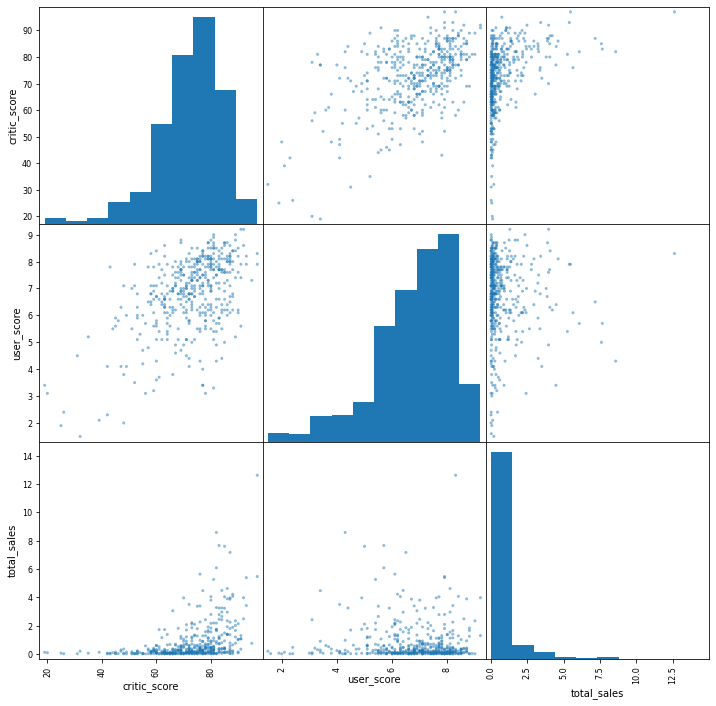

In [15]:
#Выделим данные только для перспекивных платформ от 2014
data_top_2014 = data_2014.query('platform in ["PS4", "XOne", "3DS"]')
#Выделим из данных только нужные столбцы для построения матрицы рассеяния
data_top_2014_matrix = data_top_2014.loc[:,['platform','critic_score', 
                                            'user_score', 'total_sales']]
pd.plotting.scatter_matrix(data_top_2014_matrix, figsize=(12, 12));

При оценке критиков более 60 количество проданных игр возрастает. Есть подобная тенденция и для оценок пользователей, но она более размытая и продажи выглядят лучше при оценках выше 4. 

In [16]:
#Найдем коэффициенты корреляции для перспективных платформ между оценками критиков и продажами
data_top_2014.groupby('platform')[['critic_score',
                                   'total_sales']].corr().iloc[0::2,-1]

platform              
3DS       critic_score   0.31
PS4       critic_score   0.40
XOne      critic_score   0.43
Name: total_sales, dtype: float64

Во всех 3х случаях корреляция положительная, но слабая. 

In [17]:
#Найдем коэффициенты корреляции для перспективных платформ между оценками пользователей и продажами
data_top_2014.groupby('platform')[['user_score',
                                   'total_sales']].corr().iloc[0::2,-1]

platform            
3DS       user_score   0.22 
PS4       user_score   -0.04
XOne      user_score   -0.07
Name: total_sales, dtype: float64

Можно сказать, что корреляция совсем отсутствует.

К вопросу о соотнесении выводов с продажами на других платформах. Графики выбранных перспективных компаний (PS4, XOne и 3DS) по продажам выше по сравнению с остальными компаниями.  

In [18]:
#Найдем жанры игр
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

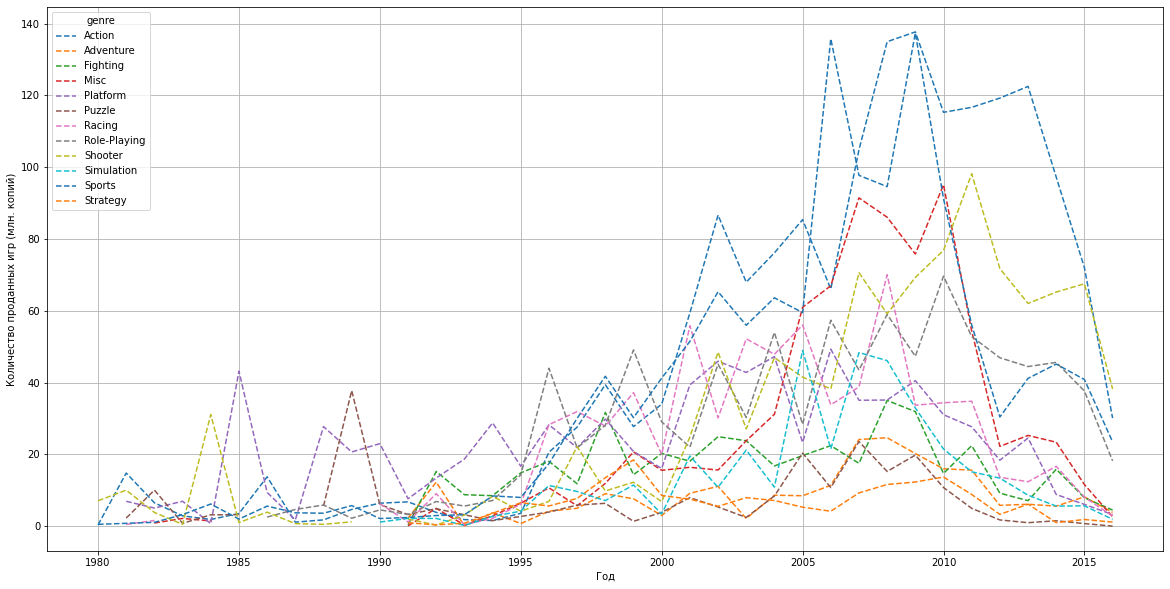

In [19]:
#Посмотрим, как менялись продажи по жанрам.
data.query('genre in ["Sports", "Platform", "Racing", "Role-Playing",\
           "Puzzle", "Misc", "Shooter", "Simulation", "Action", "Fighting",\
           "Adventure","Strategy"]').pivot_table(index='year_of_release', 
            columns = 'genre', values='total_sales', 
        aggfunc='sum').plot(grid=True, figsize=(20, 10), style='--')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр (млн. копий)')
plt.show()

Жанры не пропадают с течением времени в отличии от платформ. 

In [20]:
#Найдем медианные продажи по жанрам.
data.groupby(['genre']).agg({'total_sales':
    'median'}).sort_values(by=['total_sales'], ascending=False)

,total_sales
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16
Simulation,0.15


Вывод. По продажам лидируют PS4, XOne и 3DS. По медиане получается, что наиболее перспективные жанры Platform и Shooter.  

# 3. Портрет пользователя каждого региона


In [21]:
#удалим строки со значением Nan в столбце rating
data_rating = data_2014
data_rating.loc[data_rating['rating'].isna(), 'rating'] = 'unknown'


## 3.1 Портрет пользователя Северной Америки

In [22]:
#определим top-5 платформ для пользователей NA
data_rating.groupby(['platform']).agg({'na_sales':'sum'}).sort_values(by=['na_sales'], ascending=False).head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


Основные продажи приходятся на первые 3 платформы X360, PS4 и XOne.

In [23]:
#определим top-5 жанров для пользователей NA
data_rating.groupby(['genre']).agg({'na_sales':'median'}).sort_values(by=['na_sales'], ascending=False).head(5)

,na_sales
genre,
Shooter,0.22
Platform,0.08
Sports,0.07
Fighting,0.04
Racing,0.03


Основные продажи приходятся на жанры Shooter и Platform.

(0.0, 2.0)

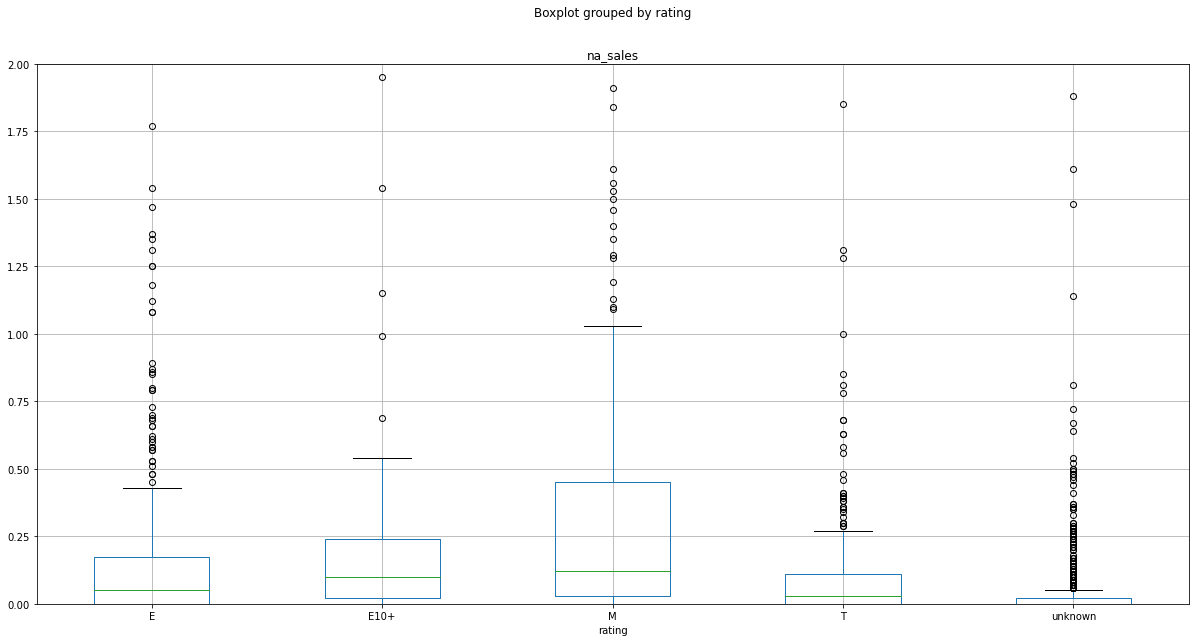

In [24]:
#Определим влияние рейтинга на продажи
data_rating.boxplot(column = 'na_sales', by = 'rating', figsize=(20, 10))
plt.ylim(0, 2)

Рейтинг ESRB влияет на продажи. Наилучшие продажи у игр с рейтингом M, а остальные примерно на одном уровне (по анализу медиан). 

## 3.2 Портрет пользователя Европы


In [25]:
#определим top-5 платформ для пользователей  EU
data_rating.groupby(['platform']).agg({'eu_sales':
    'sum'}).sort_values(by=['eu_sales'], ascending=False).head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


Основные продажи приходятся первые 3 платформы PS4, PS3 и XOne.

In [26]:
#определим top-5 жанров для пользователей NA
data_rating.groupby(['genre']).agg({'eu_sales':'median'}).sort_values(by=['eu_sales'], ascending=False).head(5)

,eu_sales
genre,
Shooter,0.22
Platform,0.06
Racing,0.05
Sports,0.05
Simulation,0.03


Основные продажи приходятся на Shooter и Platform.

(0.0, 1.0)

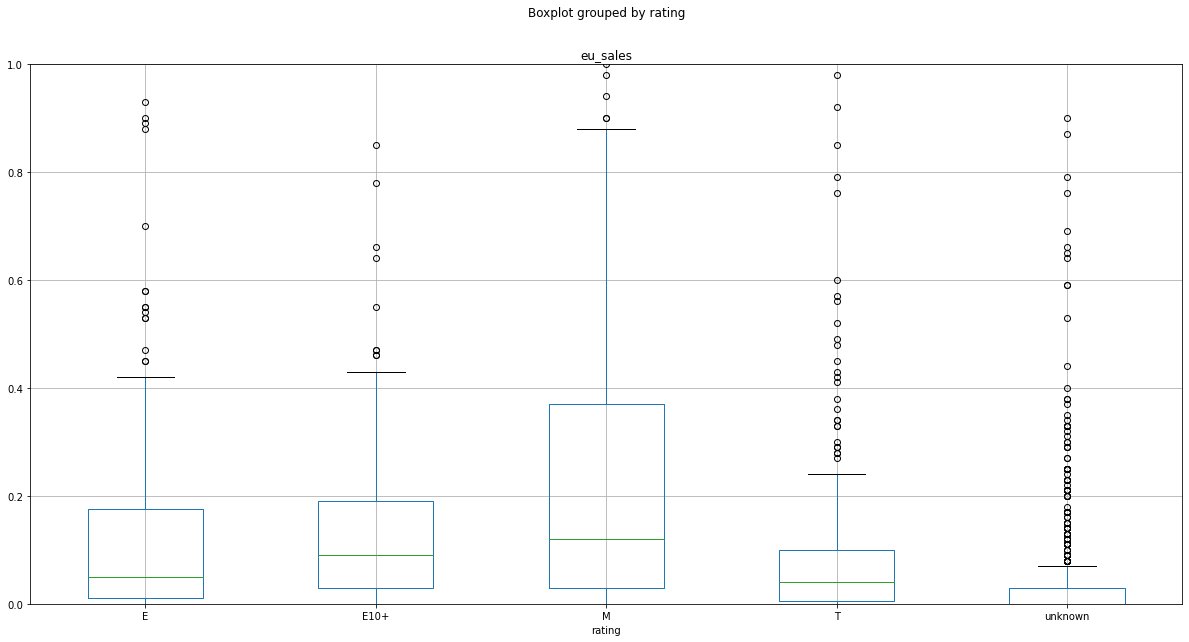

In [27]:
#Определим влияние рейтинга на продажи
data_rating.boxplot(column = 'eu_sales', by = 'rating', figsize=(20, 10))
plt.ylim(0, 1)

Рейтинг ESRB влияет на продажи. Наилучшие продажи у игр с рейтингом M, а остальные примерно на одном уровне (по анализу медиан). 

## 3.3 Портрет пользователя Японии


In [28]:
#определим top-5 платформ для пользователей Японии
data_rating.groupby(['platform']).agg({'jp_sales':'sum'}).sort_values(by=['jp_sales'], ascending=False).head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Лидером рынка Японии является платформа 3DS, т.к. она имеет заметно большие продажи по сравнению с другими. В Японии по продажам лидируют другие платформы по сравнению с Северной Америкой и Европой. 

In [29]:
#определим top-5 жанров для пользователей Японии
data_rating.groupby(['genre']).agg({'jp_sales':'median'}).sort_values(by=['jp_sales'], ascending=False).head(5)

,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Puzzle,0.03
Action,0.01
Adventure,0.01


Основные продажи приходятся на первые 2 жанра Role-Playing и Fighting. Жанры не совпадают с популярными в Европе и Северной Америке. 

(0.0, 0.05)

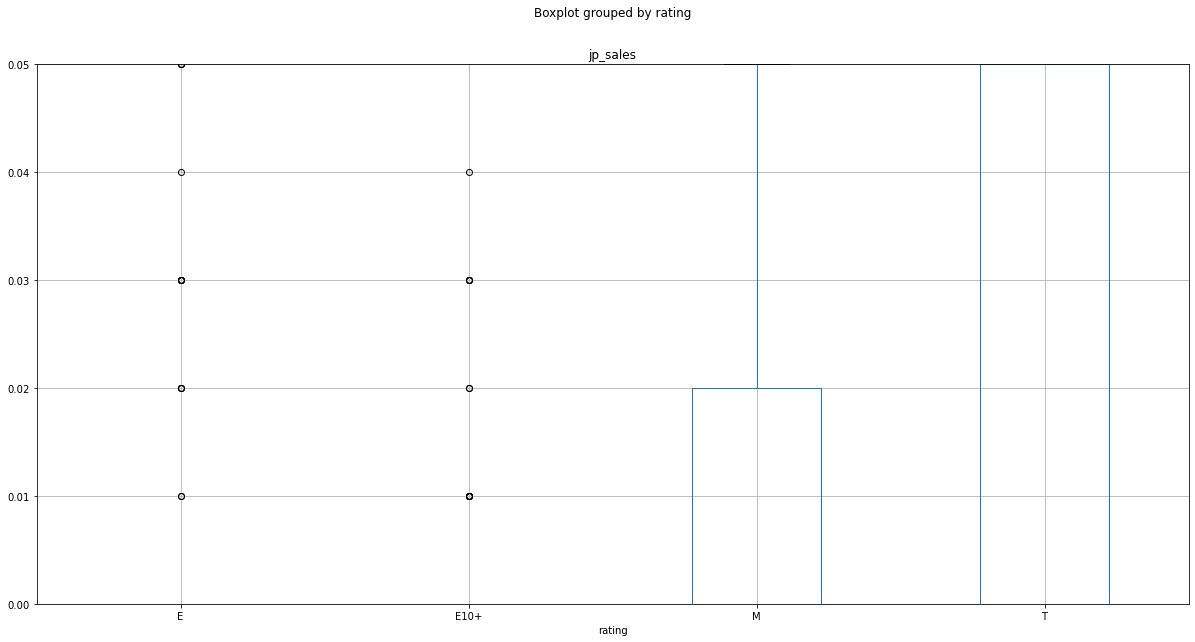

In [30]:
#Определим влияние рейтинга на продажи
data.query('year_of_release > 2014').boxplot('jp_sales', by = 'rating', 
                                             figsize=(20, 10))
plt.ylim(0, 0.05)

Медиана и границы ящика схлопываются в одну линию - ноль, поэтому зависимость найти не получается.

Вывод. Перспективны платформа PS4 и жанр shooter.

# 4. Проверка гипотез

4.1 Сформулируем нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза будет утвержадть, что средние пользовательские рейтинги платформ Xbox One и PC не одинаковые. 

In [31]:
#сделаем выборку строк где user_score не равно NaN.
sample = data_2014.dropna(subset = ['user_score'])
#Сделаем подвыборки строк для платформ XOne и PC
sample_1 = sample.query("platform == 'XOne'")
sample_2 = sample.query("platform == 'PC'")


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5.00,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.00,6.50,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.00,8.20,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.60,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.00,8.50,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.00,6.70,unknown,0.01


In [32]:

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample_1['user_score'], 
    sample_2['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Полученная вероятность , больше критического уровня, поэтому средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Считаем, что генеральные совокупности независимы, поэтому применили метод st.ttest_ind.

4.2 Сформулируем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза будет утвержадть, что средние пользовательские рейтинги жанров Action и Sports разные. 

In [33]:
#Сделаем подвыборки строк для жанров Action и Sports
sample_3 = sample.query("genre == 'Action'")
sample_4 = sample.query("genre == 'Sports'")

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample_3['user_score'], 
    sample_4['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


Полученная вероятность, меньше критического уровня, поэтому средние пользовательские рейтинги жанров Action и Sports разные.

# Общий вывод: 

1. Потенциально популярный продукт необходимо разрабатывать на платформе PS4 в жанре Shooter. Вывод основан на том, что именно это сочетание платформы и жанра подходят как для пользователей Северной Америки и Европы. Кроме того, платформа PS4 и жанр Shooter находятся в топе популярности. <div>2. Рынок Японии иной. Лидером рынка Японии является платформа 3DS, т.к. она имеет заметно большие продажи по сравнению с другими. Жанрами популярными в Японии являются жанра Role-Playing и Fighting.